# Shortest path

basic idea: circulate all locations

## how

* find center of all locations
* connect locations in order of angle around center

## unusual

* center is outside of tour: use clustering algorithm to partition problem

In [3]:
import numpy as np
import pandas as pd

cities = pd.read_csv('german-cities.csv')
locations = cities[['lat', 'lng']].to_numpy()
popsize = cities['population'].to_numpy()
states = cities['admin_name'].to_numpy()
print(locations)

[[52.52   13.405 ]
 [48.7775  9.18  ]
 [48.1375 11.575 ]
 [53.55   10.    ]
 [50.9364  6.9528]
 [50.1106  8.6822]
 [51.2333  6.7833]
 [51.34   12.375 ]
 [51.5167  7.4667]
 [51.4508  7.0131]
 [53.0833  8.8   ]
 [51.05   13.74  ]
 [52.3667  9.7167]
 [49.4539 11.0775]
 [51.4347  6.7625]
 [51.4819  7.2158]
 [51.2667  7.1833]
 [52.0211  8.5347]
 [50.7333  7.1   ]
 [51.9625  7.6256]
 [49.4878  8.4661]
 [49.0092  8.404 ]
 [48.3689 10.8978]
 [50.0825  8.24  ]
 [51.2     6.4333]
 [51.5167  7.1   ]
 [50.7756  6.0836]
 [52.2667 10.5167]
 [50.8333 12.9167]
 [54.3233 10.1394]
 [51.4828 11.9697]
 [52.1317 11.6392]
 [47.995   7.85  ]
 [51.3333  6.5667]
 [49.9833  8.2667]
 [53.8697 10.6864]
 [50.9833 11.0333]
 [51.4967  6.8706]
 [54.0833 12.1333]
 [51.3158  9.4979]
 [51.3667  7.4833]
 [52.4    13.0667]
 [49.2333  7.    ]
 [51.6833  7.8167]
 [49.4811  8.4353]
 [51.4275  6.8825]
 [53.1439  8.2139]
 [52.2833  8.05  ]
 [51.0333  6.9833]
 [49.8722  8.6528]
 [51.1667  7.0833]
 [49.4167  8.7167]
 [51.55    7

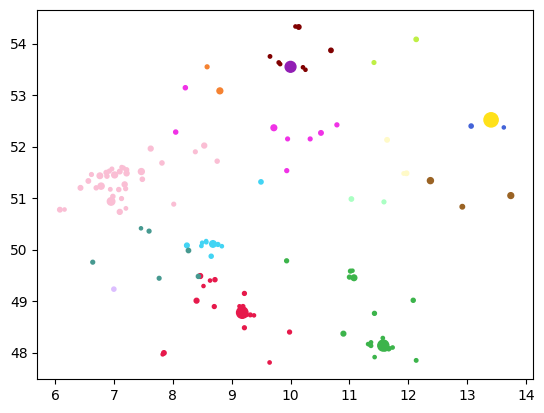

In [4]:
import matplotlib.pyplot as plt

def plotCities():
    citySize = popsize/max(popsize) * 100 + 5

    colors = ('#e6194B', '#3cb44b', '#ffe119', '#4363d8',
        '#f58231', '#911eb4', '#42d4f4', '#f032e6',
        '#bfef45', '#fabed4', '#469990', '#dcbeff',
        '#9A6324', '#fffac8', '#800000', '#aaffc3')

    federalStates = np.unique(states)
    stateColorMapping = dict(zip(federalStates, colors))
    plotColor = [stateColorMapping[s] for s in states]

    plt.scatter(locations[:, 1], locations[:, 0], s=citySize, c=plotColor)
    plt.show()

plotCities()

In [5]:
def sortLocationsAroundCenter():
    center = np.mean(locations, axis=0)

    # compute angle relative to center
    def deg(pos):
        vec = pos - center
        return np.arctan2(vec[1], vec[0]) * 180 / np.pi

    angles = np.apply_along_axis(deg, 1, locations)

    # compute distance to center
    def dist(pos):
        return np.linalg.norm(pos - center)
    distances = np.apply_along_axis(dist, 1, locations)

    # stack location, angle and distance
    combined = np.hstack((locations, angles[:, np.newaxis], distances[:, np.newaxis]))

    # sort by angle
    locOrder = combined[:, 2].argsort()
    sortedLocations = combined[locOrder]
    return sortedLocations

sortedLocations = sortLocationsAroundCenter()
print(sortedLocations)

[[  48.4833        9.2167     -179.95053395    2.16778211]
 [  49.15          9.2167     -179.92856379    1.50108247]
 [  48.8975        9.1922     -179.13841216    1.75377959]
 [  48.8598        9.1852     -178.93270392    1.79159213]
 [  48.7775        9.18       -178.82061452    1.8739783 ]
 [  48.9           9.1333     -177.21209792    1.75315628]
 [  48.895         8.705      -163.69827367    1.82963856]
 [  49.4167        8.7167     -157.87445201    1.332506  ]
 [  49.4           8.6333     -154.9292166     1.38121222]
 [  49.0092        8.404      -153.61303176    1.8328396 ]
 [  49.2933        8.5219     -152.83784248    1.52608037]
 [  47.995         7.85       -152.73977516    2.98793506]
 [  47.9664        7.8286     -152.62751173    3.02316632]
 [  49.4878        8.4661     -147.10308614    1.38543741]
 [  50.0667        8.8333     -146.60389024    0.69995405]
 [  49.4811        8.4353     -146.19873763    1.40796682]
 [  49.8722        8.6528     -144.00572239    0.9626803

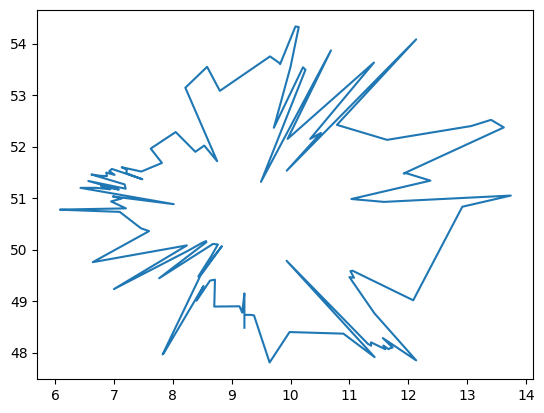

In [6]:
plt.plot(sortedLocations[:, 1], sortedLocations[:, 0])
plt.show()


# shortest path via clustering

* find clusters of locations
* connect clusters via shortest path between all cluster centers
* find shortest path in every cluster from one neighbor to another


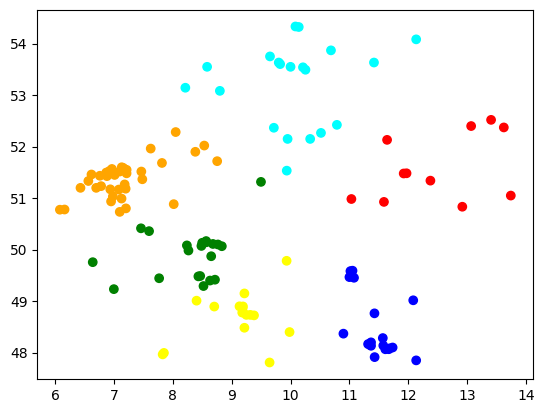

[[51.59274545 12.47949091]
 [51.36763333  7.18063889]
 [48.69479375  9.08869375]
 [49.92072381  8.30021429]
 [53.22411    10.05173   ]
 [48.49441579 11.43940526]]
{0: [array([52.52 , 13.405]), array([51.34 , 12.375]), array([51.05, 13.74]), array([50.8333, 12.9167]), array([51.4828, 11.9697]), array([52.1317, 11.6392]), array([50.9833, 11.0333]), array([52.4   , 13.0667]), array([50.9272, 11.5861]), array([51.4789, 11.9214]), array([52.373 , 13.6213])], 2: [array([48.7775,  9.18  ]), array([49.0092,  8.404 ]), array([47.995,  7.85 ]), array([49.7833,  9.9333]), array([48.4   ,  9.9833]), array([49.15  ,  9.2167]), array([48.895,  8.705]), array([48.4833,  9.2167]), array([48.7333,  9.3167]), array([48.8975,  9.1922]), array([48.7333,  9.25  ]), array([48.8598,  9.1852]), array([47.8092,  9.6444]), array([48.9   ,  9.1333]), array([48.7239,  9.3797]), array([47.9664,  7.8286])], 5: [array([48.1375, 11.575 ]), array([49.4539, 11.0775]), array([48.3689, 10.8978]), array([49.0167, 12.0833]

In [7]:
from sklearn.cluster import KMeans

def plotClusters(clusters):
    lat, lng = zip(*locations)
    colors = ["#FF0000", "#FFA500", "#FFFF00", "#008000",
        "#00FFFF", "#0000FF", "#800080", "#FFC0CB",
        "#FF69B4", "#FF1493", "#00FF00", "#7CFC00",
        "#00CED1", "#000080", "#8B008B", "#FF00FF"]
    clusterColors = [colors[index] for index in clusters]

    plt.scatter(lng, lat, c=clusterColors)
    plt.show()

def separateClusters(locations, labels):
    locWithLabels = np.hstack((locations, labels[:, np.newaxis]))
    return {label: [city[[0, 1]] for city in locWithLabels if city[2] == label] for label in labels}

def clusterCities(numClusters):
    kmeans = KMeans(n_clusters = numClusters, n_init="auto")
    kmeans.fit(locations)
    plotClusters(kmeans.labels_)
    
    clusteredLocations = separateClusters(locations, kmeans.labels_)
    return (kmeans.cluster_centers_, clusteredLocations)

clusterCenters, clusteredLocations = clusterCities(6)
print(clusterCenters)
print(clusteredLocations)

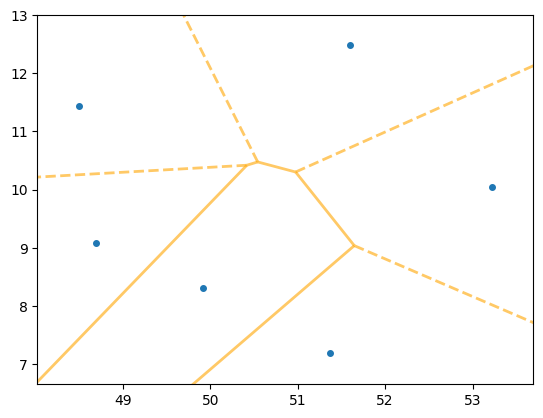

In [8]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(clusterCenters)

fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                      line_width=2, line_alpha=0.6, point_size=8)
plt.show()


In [9]:
from functools import reduce
from shapely.geometry import Polygon
import itertools

triangle = np.array([[0,0], [3,0], [3,4]])

class MyPath:
    def __init__(self, points):
        self.points = points
        poly = Polygon(points)
        self.length = poly.length

    def __str__(self):
        return f"length {self.length}"
    
    def __repr__(self):
        return f"Length: {self.length}"

def minPath(paths):
    def min(current, next):
        return next if next.length < current.length else current
    return reduce(min, paths)


def calcShortestPath(points):
    permutations = np.array(list(itertools.permutations(points)))
    perimeters = [MyPath(path) for path in permutations]
    shortest = minPath(perimeters)
    return shortest.points

shortestClusterPath = calcShortestPath(clusterCenters)
print(shortestClusterPath)


[[48.49441579 11.43940526]
 [51.59274545 12.47949091]
 [53.22411    10.05173   ]
 [51.36763333  7.18063889]
 [49.92072381  8.30021429]
 [48.69479375  9.08869375]]
